# Iris : 붖꽃 품종 예측하기

붓꽃의 품종을 분류(classification) 하자.
- Feature
    - 꽃잎의 길이와 너비
    - 꽃받침의 길이와 너비
- 분류 예측 프로세스
    - 데이터 셋 분리 : 트레인셋과 테스트셋 분리
    - 학습
    - 예측
    - 평가

In [1]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

/Users/yeonsookim/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
import pandas as pd

/Users/yeonsookim/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
iris = load_iris()

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris_data = iris.data

In [5]:
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
iris_label = iris.target # label 데이터를 numpy로 가지고 있음
print('iris target값: ', iris_label)
print('iris target명: ', iris.target_names)

iris target값:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명:  ['setosa' 'versicolor' 'virginica']


In [8]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
# test_size = 0.2 -> 테스트 데이터 20%, 학습 데이터 80%로 분할
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [10]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [11]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

In [12]:
pred = dt_clf.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
print(f'예측 정확도: {accuracy_score(y_test, pred)}')

예측 정확도: 0.9333333333333333


## Estimator 이해 및 fit(), predict() 메서드
- 지도 학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Estimator로 부름
- `cross_val_score()`과 같은 evaluation 함수, `GridSearchCV`와 같은 하이퍼 파라미터 튜닝을 지원하는 경우 이 Estimator를 인자로 받음

사이킷런에서 **비지도학습**인 차원 축소(PCA), 클러스터링, Feature Extraction 등을 구현한 클래스 역시 대부분 `fit()`, `transform()`을 적용
- 비지도 학습과 피처 추출에서 `fit()`은 지도학습의 `fit()`과 같이 학습을 의미하는 것이 아니라, **입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 작업**
- `fit()` 으로 사전 작업 끝내면 이후 입력 데이터의 PCa, Clustering, Feature Extraction 등의 실제 작업은 `transform()` 사용
- `fit_transform()` 주의 필요

## 사이킷런의 주요 모듈

- `.datasets` : 예제 데이터 셋
- `.preprocessing` : 타입 인코딩, 정규화, 스케일링 
- `.feature_selection`
- `.model_selection` : 교차 검증을 위한 데이터셋 분리, 그리드 서치
- `.metrics`
- `.ensemble`
- `.pipeline`

In [15]:
from sklearn import datasets

In [17]:
boston = datasets.load_boston()
boston_df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
boston_df['target'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [18]:
breast_cancer = datasets.load_breast_cancer()
diabetes = datasets.load_diabetes()
wine = datasets.load_wine()

In [28]:
def show_dataframe(data_name):
    df = pd.DataFrame(data=data_name.data, columns=data_name.feature_names)
    df['target'] = data_name.target
    return df.head()

In [29]:
show_dataframe(diabetes)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [24]:
show_dataframe(breast_cancer)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [25]:
show_dataframe(wine)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


- 이 외에도 `scikit_learn_data` 에서 다운로드 받아서 추가 데이터셋 사용 가능
- 표본 데이터 생성기 : `make_classification`, `make_blobs`
```
make_classification(
    n_samples=100,
    n_features=20,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
```

In [34]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
%matplotlib inline

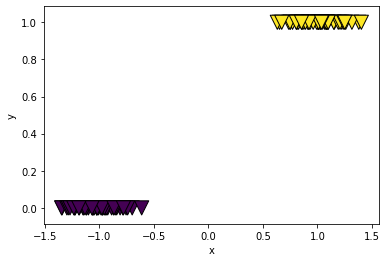

In [42]:
x, y = make_classification(n_features=1,
                           n_informative=1,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)
plt.scatter(x, y, marker='v', c=y, s = 200, edgecolor='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [43]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


- data
- target : 예측하고자 하는 값
- target_name
- feature_names
- DESCR : 설명

In [44]:
keys = iris_data.keys()
keys

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [55]:
print(f'feature_names의 type : {type(iris_data.feature_names)}')
print(f'feature_names의 shape : {len(iris_data.feature_names)}')
print(iris_data.feature_names)

feature_names의 type : <class 'list'>
feature_names의 shape : 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [53]:
print(f'target_names의 type : {type(iris_data.target_names)}')
print(f'target_names의 shape : {iris_data.target_names.shape}')
print(iris_data.target_names)

target_names의 type : <class 'numpy.ndarray'>
target_names의 shape : (3,)
['setosa' 'versicolor' 'virginica']


In [48]:
print(f'data의 type : {type(iris_data.data)}')
print(f'data의 shape : {iris_data.data.shape}')
print(iris_data['data'])

data의 type : <class 'numpy.ndarray'>
data의 shape : (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3

In [49]:
print(f'target의 type : {type(iris_data.target)}')
print(f'target의 shape : {iris_data.target.shape}')
print(iris_data.target)

target의 type : <class 'numpy.ndarray'>
target의 shape : (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Model Selection

- `train_test_split()`

In [56]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [57]:
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [58]:
pred = dt_clf.predict(train_data)
print(accuracy_score(train_label, pred))

1.0


- 이미 답을 알고 있는 상태에서 똑같은 문제를 푼 것
- `train_test_split()`을 통해 원본 데이터 셋에서 트레이닝에 쓰일 데이터와 테스트에 쓰일 데이터를 분리할 수 있음.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


/Users/yeonsookim/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
                                                   test_size = 0.3, random_state=121)

In [9]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

In [10]:
print(f'예측 정확도 : {accuracy_score(y_test, pred)}')

예측 정확도 : 0.9555555555555556


- iris 데이터는 크기 자체가 작아서 30%만으로 알고리즘의 예측 성능을 판단하기에는 적절치 않음.
- 다양한 데이터를 기반으로 성능을 살피는 것이 중요

## 교차 검증
- 위와 같은 방법은 Overfitting을 불러일으킬 수 있다.
    - 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것
- 비유하자면, 모의고사를 여러 번 치는 것
- 데이터 편중을 막기 위해서 별도의 여러 세트로 구성된 학습 데이터 셋과 검증 데이터 셋에서 학습과 평가를 수행함
- 이렇게 되면 training set, validation set, test set으로 나뉘게 됨


### K-Fold 교차 검증

가장 보편적으로 사용되는 교차 검증 기법
- K개의 데이터 폴드 세트를 만들어서 K번 만큼 각 폴드 셋에 학습과 검증 평가를 반복 수행
- 먼저 데이터 셋을 K등분하고, ...

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

In [21]:
iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

In [13]:
kfold = KFold(n_splits=5)
cv_accuracy = []
print(features.shape[0])


150


In [15]:
n_iter = 0

for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter+=1
    
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'{n_iter} 교차 검증 정확도 : {accuracy}, 학습 데이터 크기 : {train_size}, 검증 데이터 크기 : {test_size}')
    print(f'{n_iter} 검증 세트 인덱스 : {test_index}')
    cv_accuracy.append(accuracy)
    

1 교차 검증 정확도 : 1.0, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
1 검증 세트 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
2 교차 검증 정확도 : 0.9667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
2 검증 세트 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
3 교차 검증 정확도 : 0.8667, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
3 검증 세트 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
4 교차 검증 정확도 : 0.9333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
4 검증 세트 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
5 교차 검증 정확도 : 0.7333, 학습 데이터 크기 : 120, 검증 데이터 크기 : 30
5 검증 세트 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]


In [16]:
print(f'평균 검증 정확도 : {np.mean(cv_accuracy)}')

평균 검증 정확도 : 0.9


### Stratified K-Fold
- 불균현한 분포도를 가진 데이터셋을 위한 K-Fold 방식

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [8]:
kfold = KFold(n_splits=3)
n_iter = 0
for train_index, test_index in kfold.split(iris_df):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'## 교차 검증 : {n_iter}')
    print(f'학습 레이블 데이터 분포 : \n{label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포 : \n{label_test.value_counts()}')
    print()

## 교차 검증 : 1
학습 레이블 데이터 분포 : 
2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
0    50
Name: label, dtype: int64

## 교차 검증 : 2
학습 레이블 데이터 분포 : 
2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
1    50
Name: label, dtype: int64

## 교차 검증 : 3
학습 레이블 데이터 분포 : 
1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포 : 
2    50
Name: label, dtype: int64



- 첫 번째 교차 검증에서는 학습 레이블의 1,2 값이 각각 50개, 검증 레이블의 0값이 50개 추출됨
- 학습 레이블은 1,2 밖에 없으므로 0의 경우는 전혀 학습하지 못함
- 검증 레이블은 0밖에 없으므로 예측 정확도는 0이될 수밖에 없음

In [12]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter+=1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print(f'## 교차 검증 {n_iter}')
    print(f'학습 레이블 데이터 분포 :\n{label_train.value_counts()}')
    print(f'검증 레이블 데이터 분포 :\n{label_test.value_counts()}')
    print()

## 교차 검증 1
학습 레이블 데이터 분포 :
2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
2    17
1    17
0    17
Name: label, dtype: int64

## 교차 검증 2
학습 레이블 데이터 분포 :
2    33
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포 :
2    17
1    17
0    17
Name: label, dtype: int64

## 교차 검증 3
학습 레이블 데이터 분포 :
2    34
1    34
0    34
Name: label, dtype: int64
검증 레이블 데이터 분포 :
2    16
1    16
0    16
Name: label, dtype: int64



- 학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당됨

In [25]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

In [26]:
skfold.split(features, label)

<generator object _BaseKFold.split at 0x7fe8c064e6d0>

In [27]:
import numpy as np
for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred),4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print(f'## {n_iter} 교차 검증 정확도 : {accuracy}, 학습 데이터 크기 : {train_size}, 검증 데이터 크기 : {test_size}')
    print(f'## {n_iter} 검증 세트 인덱스 : {test_index}')
    cv_accuracy.append(accuracy)
    print()

    
    
    
    

## 1 교차 검증 정확도 : 0.9804, 학습 데이터 크기 : 99, 검증 데이터 크기 : 51
## 1 검증 세트 인덱스 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116]

## 2 교차 검증 정확도 : 0.9216, 학습 데이터 크기 : 99, 검증 데이터 크기 : 51
## 2 검증 세트 인덱스 : [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133]

## 3 교차 검증 정확도 : 0.9792, 학습 데이터 크기 : 102, 검증 데이터 크기 : 48
## 3 검증 세트 인덱스 : [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]



In [28]:
print(cv_accuracy)
print(np.mean(cv_accuracy))

[0.9804, 0.9216, 0.9792]
0.9604


- 왜곡된 레이블 데이터 셋에는 반드시 Stratified K-Fold를 이용해 교차 검증해야 함
- 일반적으로 분류에서의 교차 검증은 이걸 사용해야 함. 회귀에서는 지원되지 않음
    - 회귀의 결정값은 연속값이기 때문에

### 교차검증을 보다 간편하게 `cross_val_score()`

- K-Fold
    - 폴드 세트를 설정
    - 반복문으로 학습, 테스트 데이터 인덱스 추출
    - 반복적으로 학습와 예측 수행

- `cross_val_score()`는 이 과정을 한꺼번에 수행해줌

```
cross_val_score(
    estimator,
    X,
    y=None,
    groups=None,
    scoring=None,
    cv='warn',
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score='raise-deprecating',
)
```

- estimator : 분류나 회귀냐
- cv : 교차 검증 필드 수 

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

In [30]:
iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target


In [31]:
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도: ', np.round(scores, 4))
print('평균 검증 정확도: ', np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.9804 0.9216 0.9792]
평균 검증 정확도:  0.9604


## GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

In [33]:
grid_parameters = {'max_depth' : [1,2,3],
                  'min_samples_split' : [2,3]
                  }

- 하이퍼 파라미터 변경하면서 교차 검증 데이터 셋에 적용

```
GridSearchCV(
    estimator,
    param_grid,
    scoring=None,
    n_jobs=None,
    iid='warn',
    refit=True,
    cv='warn',
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score='raise-deprecating',
    return_train_score=False,
)
```

- estimator
- param_grid : 튜닝할 하이퍼 파라미터 딕셔너리
- scoring : 예측 성능 평가 방법
- cv : 교차 검증을 위해 분할되는 학습/테스트 셋의 개수
- refit : True가 디폴트. 가장 최적의 하이퍼 파라미터를 찾은 후 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습 시킴


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [40]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=121)

dtree = DecisionTreeClassifier()
parameters = {'max_depth' : [1,2,3], 'min_samples_split':[2,3]}


In [41]:
import pandas as pd
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [44]:
grid_dtree.cv_results_

{'mean_fit_time': array([0.00054463, 0.00033045, 0.00025678, 0.0003109 , 0.00034968,
        0.00032528]),
 'std_fit_time': array([1.24074570e-04, 5.00750915e-05, 3.13596722e-05, 8.80105858e-06,
        1.98564495e-05, 8.92151435e-06]),
 'mean_score_time': array([0.00034237, 0.00023731, 0.00020631, 0.00022928, 0.00023794,
        0.00022602]),
 'std_score_time': array([8.07538897e-05, 2.05734958e-05, 6.26644381e-05, 5.17001342e-06,
        8.92080638e-07, 3.69869114e-06]),
 'param_max_depth': masked_array(data=[1, 1, 2, 2, 3, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'min_samples_split': 2},
  {'max_depth': 1, 'min_samples_split': 3},
  {'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_sa

In [43]:
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000545,0.000124,0.000342,8.075389e-05,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,0.000000,5
1,0.000330,0.000050,0.000237,2.057350e-05,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,0.000000,5
2,0.000257,0.000031,0.000206,6.266444e-05,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,0.031180,3
3,0.000311,0.000009,0.000229,5.170013e-06,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,0.031180,3
4,0.000350,0.000020,0.000238,8.920806e-07,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,0.020412,1


GridSearchCV 객체에 fit()을 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평과 결과 값이 각각 `best_params_`, `best_score_` 속성에 기록됨

In [45]:
print('GridSearchCV 최적 파라미터 : ', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도 : ', grid_dtree.best_score_)

GridSearchCV 최적 파라미터 :  {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도 :  0.975


In [46]:
estimator = grid_dtree.best_estimator_ # refit = True 로 했으므로, 학습된 estimator 반환
pred = estimator.predict(X_test)
print('테스트 셋 정확도 : ', accuracy_score(y_test, pred))

테스트 셋 정확도 :  0.9666666666666667


# 데이터 전처리

## 데이터 인코딩



레이블 인코딩
- `preprocessing` 모듈안에 LabelEncoder 클래스로 구현
- fit() -> transform() 호출

In [48]:
from sklearn.preprocessing import LabelEncoder

items=['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print(labels)

[0 1 4 5 3 3 2 2]


`classes_` 를 통해 속성값 확인

In [49]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [50]:
print('디코딩 원본 값: ', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본 값:  ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 레이블 인코딩은 문자열 값을 숫자형 카테고리 값으로 변환함
- 몇몇 ML 알고리즘에서는 이를 적용할 경우 예측 성능이 떨어질 수 있음.
    - 숫자 값의 크고 작음에 대한 특성이 작용하여 큰 값에 더 중요하게 인식할 수도 잇음
    - 이러한 레이블 인코딩은 선형회귀 같은 ML에는 적용하지 않아야 함
    - 트리 기반 ML은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 별 문제 없음
- 이러한 문제점을 해결하기 위해 원-핫 인코딩

### One-Hot Encoding

- 해당하는 컬럼에만 1, 나머지 컬럼에는 0 표시
- 주의!! 모든 문자열 값이 숫자형으로 변환되어야 함.
- 입력 값으로 2차원 데이터가 필요함

In [51]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [53]:
items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 숫자값으로 변환하기; 위해 labelencoder 사용

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1,1)

In [55]:
labels.shape

(8, 1)

In [56]:
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


/Users/yeonsookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


판다스에서는 원-핫 인코딩을 더 쉽게 지원하는 API가 있음. `get_dummies()`

사이킷런의 OneHotEncoder와 다르게 문자열 카테고리 값을 숫자형으로 변환할 필요 없이 바로 변환할 수 있음

In [57]:
import pandas as pd

df = pd.DataFrame({'items' : ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자레인지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


```
pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
)
```

## 피처 스케일링과 정규화

서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 피처 스케일링이라고 함.

- 표준화
    - 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환
- 정규화
    - 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념
    - 예. 최소 0~최대 1의 값으로 변환
    - 즉 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것

### StandardScaler

- 표준화를 지원하는 클래스
- 개별 피쳐의 평균이 0이고 분산이 1인 값으로 변환해줌
- 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것은 중요함... 이를 가정하고 구현된 ML 알고리즘들이 많기 때문
    - RBF-SVM, Linear Regression, Logistic Regression

In [58]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

In [59]:
print(iris_df.mean())
print(iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.mean())
print(iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler

- 데이터 값을 0과 1사이의 범위 값으로 변환
- 음수값이 있으면 -1에서 1값으로 변환
- 데이터의 분포가 가우시안 분포가 아닐 경우에 Min, Max Scale을 적용해볼 수 있음


In [63]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.min())
print(iris_df_scaled.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 타이타닉 생존자 예측

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/Users/yeonsookim/Desktop/titanic/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Null 값을 처리 -> 간단히...

In [66]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print(titanic_df.isnull().sum().sum())

0


In [68]:
print(titanic_df['Sex'].value_counts())
print()
print(titanic_df['Cabin'].value_counts())
print()
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64

N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
D15              1
D6               1
C54              1
D45              1
E10              1
Name: Cabin, Length: 148, dtype: int64

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


- Cabin(선실)의 경우 N이 제일 많은 것도 특이하지만, 속성값이 제대로 정리 되지 않은 듯 함
- 선실 등급을 나타내는 첫 번째 알파벳이 의미있는 듯 함

In [69]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

In [70]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

- 0 : 사망, 1 : 생존

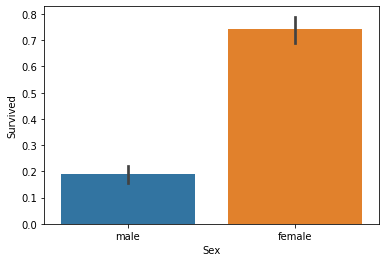

In [71]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

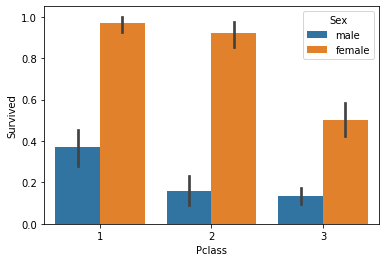

In [72]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

- 여성일 경우 1,2 등실에 따른 생존 확률 차이는 크지 않으나 3등실의 경우 생존확률이 많이 떨어짐
- 남성 -> 1등실 생존 확률 높다

In [73]:
def get_category(age):
    cat = ''
    if age <= -1 : cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

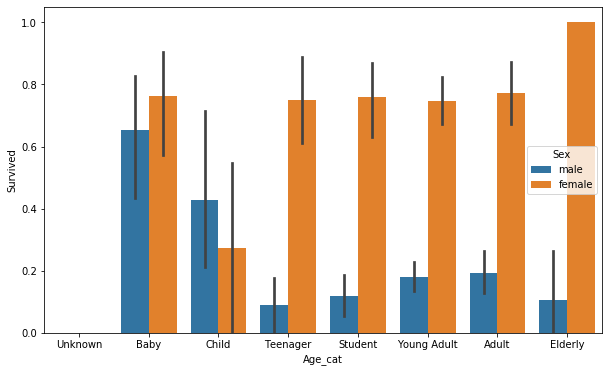

In [74]:
plt.figure(figsize=(10,6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue = 'Sex', data=titanic_df, order = group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [75]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF


In [76]:
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [77]:
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

In [78]:
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace=True)
    return df

In [79]:
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [80]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [81]:
titanic_df = pd.read_csv('/Users/yeonsookim/Desktop/titanic/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis = 1)

X_titanic_df = transform_features(X_titanic_df)

In [82]:
X_titanic_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.000000,1,0,7.2500,7,3
1,1,0,38.000000,1,0,71.2833,2,0
2,3,0,26.000000,0,0,7.9250,7,3
3,1,0,35.000000,1,0,53.1000,2,3
4,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,7,3
887,1,0,19.000000,0,0,30.0000,1,3
888,3,0,29.699118,1,2,23.4500,7,3
889,1,1,26.000000,0,0,30.0000,2,0


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size = 0.2, random_state=11)

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

In [87]:
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : ', accuracy_score(y_test, dt_pred))

DecisionTreeClassifier 정확도 :  0.7877094972067039


In [88]:
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForesetClassifier 정확도 : ', accuracy_score(y_test,rf_pred))

RandomForesetClassifier 정확도 :  0.8324022346368715


/Users/yeonsookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [89]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : ', accuracy_score(y_test, lr_pred))

/Users/yeonsookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression 정확도 :  0.8659217877094972


- 교차 검증으로 트리 모델을 평가해보자

In [91]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f'교차 검증 {iter_count} 정확도 : {accuracy}')
        
    mean_score = np.mean(scores)
    print(f'평균 정확도 : {mean_score}')
        
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도 : 0.7541899441340782
교차 검증 1 정확도 : 0.7808988764044944
교차 검증 2 정확도 : 0.7865168539325843
교차 검증 3 정확도 : 0.7696629213483146
교차 검증 4 정확도 : 0.8202247191011236
평균 정확도 : 0.782298662984119


In [93]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f'교차 검증 {iter_count} 정확도 : {accuracy}')
    
print(f'평균 정확도 : {np.mean(scores)}')

교차 검증 0 정확도 : 0.7430167597765364
교차 검증 1 정확도 : 0.776536312849162
교차 검증 2 정확도 : 0.7808988764044944
교차 검증 3 정확도 : 0.7752808988764045
교차 검증 4 정확도 : 0.8418079096045198
평균 정확도 : 0.7835081515022234


- K-Fold와 다른 이유 : `cross_val_score()`은 Stratified K-Fold 이용

In [94]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth' : [2,3,5,10],
             'min_samples_split' : [2,3,5],
             'min_samples_leaf' : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('최적 하이퍼 파라미터 : ', grid_dclf.best_params_)
print('최고 정확도 : ', grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 셋에서의 정확도 : ', accuracy)

최적 하이퍼 파라미터 :  {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
최고 정확도 :  0.7991573033707865
테스트 셋에서의 정확도 :  0.8715083798882681


/Users/yeonsookim/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [95]:
p = grid_dclf.predict(X_test)
acc = accuracy_score(y_test, p)
print(accuracy)

0.8715083798882681
